# Data Exploration

This Jupyter notebook is designed as a detailed guide to help us thoroughly examine the data for our project. The main goal is to analyze the data using various exploration techniques, visualization tools, and statistical methods. By doing so, we aim to identify patterns, relationships, trends, and any unusual findings within the data, giving us a clearer understanding of its overall distribution and features.

Upon reviewing this notebook, users will learn:

- How to load and review the initial data files.
- Techniques for summarizing and analyzing data.
- Methods for visualizing data through various charts and graphs.
- Identifying trends and irregularities in the dataset.
- Using insights to make well-informed project decisions.

<div class="alert alert-block alert-info">
Installing Dependencies
<b>

To install the dependencies for this project, run the following command to install the dependencies specified in the requirements.txt file: 

pip install -r requirements.txt

</div>

In [135]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import Packages

In [136]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Load Data


In [137]:
years = [2018,2019,2020,2021]
relative_path = "../data/project.sqlite"
db_path = os.path.abspath(relative_path)

conn = sqlite3.connect(db_path)
airports_daily_traffic_dfs = {}

weather_data_df = pd.read_sql_query(f"SELECT * FROM daily_weather_data", conn)

for year in years:
    airports_daily_traffic_dfs[year] = pd.read_sql_query(f"SELECT * FROM airports_daily_traffic_{year}", conn)

In [138]:
weather_data_df.head()

,Date,tavg,tmin,tmax,percp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,14.2,8.8,18.0,None,None,345.0,16.0,NaN,1013.5,None
1,2018-01-02,15.6,11.0,18.3,None,None,NaN,11.3,NaN,1015.7,None
2,2018-01-03,17.5,15.0,19.0,None,None,NaN,11.9,NaN,1013.9,None
3,2018-01-04,14.7,11.0,17.0,None,None,NaN,14.6,NaN,1007.4,None
4,2018-01-05,13.8,10.0,19.0,None,None,10.0,16.2,NaN,1003.7,None


In [139]:
airports_daily_traffic_dfs[2018].head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
0,2018-01-01,1,1.0,7.0,8.0,0.0,8.0,8,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,2018-01-02,2,1.0,10.0,11.0,0.0,10.0,10,0.0,2.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
2,2018-01-03,3,11.0,9.0,20.0,6.0,15.0,21,1.0,0.0,...,1.0,1,0.0,0.0,0.0,5.0,5.0,10.0,0.0,53.0
3,2018-01-04,4,1.0,11.0,12.0,0.0,11.0,11,0.0,0.0,...,0.0,0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,27.0
4,2018-01-05,5,1.0,7.0,8.0,0.0,10.0,10,0.0,1.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [140]:
airports_daily_traffic_dfs[2019].head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
0,2019-01-01,1,4.0,4.0,8.0,1.0,7.0,8,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,2019-01-02,2,3.0,22.0,25.0,0.0,25.0,25,0.0,0.0,...,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,51.0
2,2019-01-03,3,0.0,9.0,9.0,0.0,9.0,9,0.0,2.0,...,2.0,2,1.0,0.0,1.0,7.0,7.0,14.0,3.0,40.0
3,2019-01-04,4,0.0,8.0,8.0,0.0,9.0,9,0.0,2.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0
4,2019-01-05,5,1.0,19.0,20.0,0.0,20.0,20,0.0,1.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0


In [141]:
airports_daily_traffic_dfs[2020].head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL),INIT.
0,2020-01-01,1,3.0,24.0,27.0,3.0,24,27,0.0,0.0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,55.0,None
1,2020-01-02,2,13.0,0.0,13.0,13.0,1,14,3.0,0.0,...,3,0.0,1.0,1.0,1.0,1.0,2.0,0.0,36.0,None
2,2020-01-03,3,2.0,11.0,13.0,0.0,14,14,2.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,None
3,2020-01-04,4,3.0,20.0,23.0,0.0,23,23,0.0,2.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,7.0,57.0,None
4,2020-01-05,5,2.0,15.0,17.0,0.0,18,18,0.0,0.0,...,0,2.0,0.0,2.0,0.0,0.0,0.0,7.0,44.0,None


In [142]:
airports_daily_traffic_dfs[2021].head()

,Date,Day,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,...,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
0,2021-01-01,1,0.0,3.0,3.0,0.0,2.0,2,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2021-01-02,2,3.0,7.0,10.0,0.0,11.0,11,0.0,3.0,...,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
2,2021-01-03,3,3.0,1.0,4.0,0.0,3.0,3,0.0,0.0,...,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,11.0
3,2021-01-04,4,3.0,2.0,5.0,0.0,6.0,6,0.0,0.0,...,0.0,0,0.0,0.0,0.0,3.0,3.0,6.0,0.0,17.0
4,2021-01-05,5,3.0,0.0,3.0,1.0,1.0,2,6.0,0.0,...,1.0,6,3.0,0.0,3.0,9.0,9.0,18.0,0.0,38.0


#### Data Exploration

##### Exploration of Daily Airport Traffic Data

In [143]:
airports_daily_traffic_dfs[2018].shape

(377, 22)

In [144]:
airports_daily_traffic_dfs[2019].shape

(377, 22)

In [145]:
airports_daily_traffic_dfs[2020].shape

(371, 23)

As daily air traffic data of 2020 has one extra column will get rid of that column for merging with other years datamraes for analysis. 

In [146]:
airports_daily_traffic_dfs[2020] = airports_daily_traffic_dfs[2020].drop(["INIT."], axis = 1)

In [147]:
airports_daily_traffic_dfs[2020].shape

(371, 22)

Merging the daily airport dataframes of year 2018,2019,2020 & 2021 in one dataframe for further analysis

In [148]:
pieces = {2018: airports_daily_traffic_dfs[2018], 2019: airports_daily_traffic_dfs[2019], 2020: airports_daily_traffic_dfs[2020], 2021: airports_daily_traffic_dfs[2021]}

merged_airports_daily_traffic_df = pd.concat(pieces)

In [149]:
merged_airports_daily_traffic_df.shape

(1502, 22)

In [150]:
merged_airports_daily_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1502 entries, (2018, 0) to (2021, 376)
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1454 non-null   object 
 1   Day               1502 non-null   object 
 2   IntlLandings_R11  1502 non-null   float64
 3   IntlLandings_R29  1502 non-null   float64
 4   IntlLandings_TTL  1502 non-null   float64
 5   IntlTakeOffs_R11  1502 non-null   float64
 6   IntlTakeOffs_R29  1502 non-null   float64
 7   IntlTakeOffs_TTL  1502 non-null   int64  
 8   DomsLandings_R11  1501 non-null   float64
 9   DomsLandings_R29  1501 non-null   float64
 10  DomsLandings_TTL  1502 non-null   float64
 11  DomsTakeOffs_R11  1501 non-null   float64
 12  DomsTakeOffs_R29  1501 non-null   float64
 13  DomsTakeOffs_TTL  1502 non-null   int64  
 14  TransitA/C        1501 non-null   float64
 15  TransitHEL        1499 non-null   float64
 16  TransitTTL        1502 non-

In [151]:
merged_airports_daily_traffic_df.describe()

,IntlLandings_R11,IntlLandings_R29,IntlLandings_TTL,IntlTakeOffs_R11,IntlTakeOffs_R29,IntlTakeOffs_TTL,DomsLandings_R11,DomsLandings_R29,DomsLandings_TTL,DomsTakeOffs_R11,DomsTakeOffs_R29,DomsTakeOffs_TTL,TransitA/C,TransitHEL,TransitTTL,HeliCopLND,HeliCopT/O,HeliCopTTL,T/G,TotalSum(TTL)
count,1502.000000,1502.00000,1502.000000,1502.000000,1502.000000,1502.000000,1501.000000,1501.000000,1502.000000,1501.000000,1501.000000,1502.000000,1501.000000,1499.000000,1502.00000,1501.000000,1501.000000,1502.000000,1492.000000,1502.000000
mean,6.322237,34.29028,40.612517,3.934754,36.665779,40.600533,0.487675,3.121919,3.599201,0.506329,3.103264,3.600533,2.595603,0.449633,3.04261,9.722851,9.694870,19.404794,3.563003,114.399467
std,22.337220,112.51381,127.922300,15.409438,118.371389,127.920560,2.354148,10.373193,11.447028,2.302924,10.301165,11.426337,8.140824,1.696802,9.49116,28.054265,27.897864,55.930395,11.366909,337.486852
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.00000,10.000000,0.000000,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,1.000000,16.00000,21.000000,0.000000,17.000000,21.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,4.000000,4.000000,8.000000,0.000000,59.000000
75%,4.000000,29.00000,32.000000,2.000000,30.000000,32.000000,0.000000,3.000000,3.000000,0.000000,3.000000,3.000000,2.000000,0.000000,3.00000,9.000000,9.000000,18.000000,3.000000,83.000000
max,322.000000,1086.00000,1234.000000,252.000000,1147.000000,1227.000000,46.000000,166.000000,167.000000,44.000000,162.000000,164.000000,100.000000,25.000000,123.00000,327.000000,310.000000,634.000000,131.000000,3034.000000


In [152]:
merged_airports_daily_traffic_df.head(7)

Date Day  IntlLandings_R11  IntlLandings_R29  IntlLandings_TTL  \
2018 0  2018-01-01   1               1.0               7.0               8.0   
     1  2018-01-02   2               1.0              10.0              11.0   
     2  2018-01-03   3              11.0               9.0              20.0   
     3  2018-01-04   4               1.0              11.0              12.0   
     4  2018-01-05   5               1.0               7.0               8.0   
     5  2018-01-06   6               1.0              12.0              13.0   
     6  2018-01-07   7               1.0              12.0              13.0   

        IntlTakeOffs_R11  IntlTakeOffs_R29  IntlTakeOffs_TTL  \
2018 0               0.0               8.0                 8   
     1               0.0              10.0                10   
     2               6.0              15.0                21   
     3               0.0              11.0                11   
     4               0.0              10.0                10   
     5               0.0              12.0                12   
     6               0.0              15.0                15   

        DomsLandings_R11  DomsLandings_R29  ...  DomsTakeOffs_R29  \
2018 0               0.0               0.0  ...               0.0   
     1               0.0               2.0  ...               2.0   
     2               1.0               0.0  ...               1.0   
     3               0.0               0.0  ...               0.0   
     4               0.0               1.0  ...               1.0   
     5               0.0               0.0  ...               0.0   
     6               0.0               3.0  ...               3.0   

        DomsTakeOffs_TTL  TransitA/C  TransitHEL  TransitTTL  HeliCopLND  \
2018 0                 0         0.0         0.0         0.0         0.0   
     1                 2         0.0         0.0         0.0         0.0   
     2                 1         0.0         0.0         0.0         5.0   
     3                 0         0.0         0.0         0.0         2.0   
     4                 1         0.0         0.0         0.0         0.0   
     5                 0         1.0         0.0         1.0         0.0   
     6                 3         0.0         0.0         0.0         7.0   

        HeliCopT/O  HeliCopTTL  T/G  TotalSum(TTL)  
2018 0         0.0         0.0  0.0           16.0  
     1         0.0         0.0  0.0           25.0  
     2         5.0        10.0  0.0           53.0  
     3         2.0         4.0  0.0           27.0  
     4         0.0         0.0  0.0           20.0  
     5         0.0         0.0  0.0           26.0  
     6         7.0        14.0  0.0           48.0  

[7 rows x 22 columns]

In [153]:
merged_airports_daily_traffic_df.tail(7)

Date  Day  IntlLandings_R11  IntlLandings_R29  \
2021 370  2021-12-26   26              15.0               6.0   
     371  2021-12-27   27               3.0              15.0   
     372  2021-12-28   28               4.0              18.0   
     373  2021-12-29   29              22.0               2.0   
     374  2021-12-30   30              18.0               0.0   
     375  2021-12-31   31              19.0               0.0   
     376        None  TTL             239.0             400.0   

          IntlLandings_TTL  IntlTakeOffs_R11  IntlTakeOffs_R29  \
2021 370              21.0              11.0              11.0   
     371              18.0               2.0              15.0   
     372              22.0               0.0              23.0   
     373              24.0              17.0               5.0   
     374              18.0              18.0               1.0   
     375              19.0              21.0               0.0   
     376             639.0             212.0             433.0   

          IntlTakeOffs_TTL  DomsLandings_R11  DomsLandings_R29  ...  \
2021 370                22               0.0               0.0  ...   
     371                17               2.0               2.0  ...   
     372                23               0.0               7.0  ...   
     373                22               1.0               1.0  ...   
     374                19               2.0               0.0  ...   
     375                21               1.0               0.0  ...   
     376               645              16.0              33.0  ...   

          DomsTakeOffs_R29  DomsTakeOffs_TTL  TransitA/C  TransitHEL  \
2021 370               0.0                 0         0.0         0.0   
     371               3.0                 4         1.0         0.0   
     372               7.0                 7         1.0         0.0   
     373               0.0                 2         1.0         0.0   
     374               0.0                 2         0.0         0.0   
     375               0.0                 1         0.0         0.0   
     376              33.0                49        27.0         2.0   

          TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL   T/G  TotalSum(TTL)  
2021 370         0.0         0.0         0.0         0.0   0.0           43.0  
     371         1.0         0.0         0.0         0.0   0.0           44.0  
     372         1.0         5.0         5.0        10.0   0.0           70.0  
     373         1.0         7.0         7.0        14.0   1.0           66.0  
     374         0.0         3.0         3.0         6.0   0.0           47.0  
     375         0.0         0.0         0.0         0.0   0.0           42.0  
     376        29.0       119.0       119.0       238.0  39.0         1688.0  

[7 rows x 22 columns]

From the data we can see that there is a rows where Date is None and Day = "TTL", which means the total count of the month. so have to create a new dataframe out of those rows.

In [154]:
# filling null values
merged_airports_daily_traffic_df.fillna(method='ffill', inplace=True)

In [155]:
merged_airports_daily_traffic_df.tail()

Date  Day  IntlLandings_R11  IntlLandings_R29  \
2021 372  2021-12-28   28               4.0              18.0   
     373  2021-12-29   29              22.0               2.0   
     374  2021-12-30   30              18.0               0.0   
     375  2021-12-31   31              19.0               0.0   
     376  2021-12-31  TTL             239.0             400.0   

          IntlLandings_TTL  IntlTakeOffs_R11  IntlTakeOffs_R29  \
2021 372              22.0               0.0              23.0   
     373              24.0              17.0               5.0   
     374              18.0              18.0               1.0   
     375              19.0              21.0               0.0   
     376             639.0             212.0             433.0   

          IntlTakeOffs_TTL  DomsLandings_R11  DomsLandings_R29  ...  \
2021 372                23               0.0               7.0  ...   
     373                22               1.0               1.0  ...   
     374                19               2.0               0.0  ...   
     375                21               1.0               0.0  ...   
     376               645              16.0              33.0  ...   

          DomsTakeOffs_R29  DomsTakeOffs_TTL  TransitA/C  TransitHEL  \
2021 372               7.0                 7         1.0         0.0   
     373               0.0                 2         1.0         0.0   
     374               0.0                 2         0.0         0.0   
     375               0.0                 1         0.0         0.0   
     376              33.0                49        27.0         2.0   

          TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL   T/G  TotalSum(TTL)  
2021 372         1.0         5.0         5.0        10.0   0.0           70.0  
     373         1.0         7.0         7.0        14.0   1.0           66.0  
     374         0.0         3.0         3.0         6.0   0.0           47.0  
     375         0.0         0.0         0.0         0.0   0.0           42.0  
     376        29.0       119.0       119.0       238.0  39.0         1688.0  

[5 rows x 22 columns]

##### Creating a dataframe for total traffic by months

In [156]:
merged_airports_TTL_traffic_df = merged_airports_daily_traffic_df[merged_airports_daily_traffic_df['Day'] == 'TTL']

In [157]:
merged_airports_TTL_traffic_df.head()

Date  Day  IntlLandings_R11  IntlLandings_R29  \
2018 31   2018-01-31  TTL              80.0             236.0   
     60   2018-02-28  TTL             102.0             236.0   
     92   2018-03-31  TTL             146.0             407.0   
     123  2018-04-30  TTL             178.0             654.0   
     155  2018-05-31  TTL             137.0             897.0   

          IntlLandings_TTL  IntlTakeOffs_R11  IntlTakeOffs_R29  \
2018 31              316.0              24.0             293.0   
     60              338.0              64.0             274.0   
     92              553.0              99.0             453.0   
     123             832.0             105.0             727.0   
     155            1034.0              94.0             933.0   

          IntlTakeOffs_TTL  DomsLandings_R11  DomsLandings_R29  ...  \
2018 31                317               5.0              29.0  ...   
     60                338               1.0               3.0  ...   
     92                552               5.0              23.0  ...   
     123               832               2.0              29.0  ...   
     155              1027               8.0              59.0  ...   

          DomsTakeOffs_R29  DomsTakeOffs_TTL  TransitA/C  TransitHEL  \
2018 31               31.0                35        27.0         2.0   
     60                3.0                 3        18.0         1.0   
     92               26.0                29        26.0        11.0   
     123              29.0                31        20.0         7.0   
     155              60.0                68        31.0        12.0   

          TransitTTL  HeliCopLND  HeliCopT/O  HeliCopTTL    T/G  TotalSum(TTL)  
2018 31         29.0       119.0       119.0       238.0   49.0         1018.0  
     60         19.0       106.0       106.0       212.0   45.0          959.0  
     92         37.0       139.0       139.0       278.0   70.0         1547.0  
     123        27.0       136.0       136.0       272.0   41.0         2066.0  
     155        43.0       147.0       147.0       294.0  113.0         2646.0  

[5 rows x 22 columns]

In [158]:
merged_airports_daily_traffic_df_filtred= merged_airports_daily_traffic_df[merged_airports_daily_traffic_df['Day'] != 'TTL']
merged_airports_daily_traffic_df_filtred.shape

(1454, 22)

In [159]:
merged_airports_TTL_traffic_df['Date'] = pd.to_datetime(merged_airports_TTL_traffic_df['Date'])

C:\Users\ALIF\AppData\Local\Temp\ipykernel_20620\3430507578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_airports_TTL_traffic_df['Date'] = pd.to_datetime(merged_airports_TTL_traffic_df['Date'])


In [160]:
merged_airports_TTL_traffic_df['Date'] = merged_airports_TTL_traffic_df['Date'].dt.strftime('%b %Y')

C:\Users\ALIF\AppData\Local\Temp\ipykernel_20620\3359093612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_airports_TTL_traffic_df['Date'] = merged_airports_TTL_traffic_df['Date'].dt.strftime('%b %Y')


In [161]:
#Changing Date Formation
merged_airports_TTL_traffic_df.head()

Date  Day  IntlLandings_R11  IntlLandings_R29  IntlLandings_TTL  \
2018 31   Jan 2018  TTL              80.0             236.0             316.0   
     60   Feb 2018  TTL             102.0             236.0             338.0   
     92   Mar 2018  TTL             146.0             407.0             553.0   
     123  Apr 2018  TTL             178.0             654.0             832.0   
     155  May 2018  TTL             137.0             897.0            1034.0   

          IntlTakeOffs_R11  IntlTakeOffs_R29  IntlTakeOffs_TTL  \
2018 31               24.0             293.0               317   
     60               64.0             274.0               338   
     92               99.0             453.0               552   
     123             105.0             727.0               832   
     155              94.0             933.0              1027   

          DomsLandings_R11  DomsLandings_R29  ...  DomsTakeOffs_R29  \
2018 31                5.0              29.0  ...              31.0   
     60                1.0               3.0  ...               3.0   
     92                5.0              23.0  ...              26.0   
     123               2.0              29.0  ...              29.0   
     155               8.0              59.0  ...              60.0   

          DomsTakeOffs_TTL  TransitA/C  TransitHEL  TransitTTL  HeliCopLND  \
2018 31                 35        27.0         2.0        29.0       119.0   
     60                  3        18.0         1.0        19.0       106.0   
     92                 29        26.0        11.0        37.0       139.0   
     123                31        20.0         7.0        27.0       136.0   
     155                68        31.0        12.0        43.0       147.0   

          HeliCopT/O  HeliCopTTL    T/G  TotalSum(TTL)  
2018 31        119.0       238.0   49.0         1018.0  
     60        106.0       212.0   45.0          959.0  
     92        139.0       278.0   70.0         1547.0  
     123       136.0       272.0   41.0         2066.0  
     155       147.0       294.0  113.0         2646.0  

[5 rows x 22 columns]

In [162]:
merged_airports_TTL_traffic_df.columns

Index(['Date', 'Day', 'IntlLandings_R11', 'IntlLandings_R29',
       'IntlLandings_TTL', 'IntlTakeOffs_R11', 'IntlTakeOffs_R29',
       'IntlTakeOffs_TTL', 'DomsLandings_R11', 'DomsLandings_R29',
       'DomsLandings_TTL', 'DomsTakeOffs_R11', 'DomsTakeOffs_R29',
       'DomsTakeOffs_TTL', 'TransitA/C', 'TransitHEL', 'TransitTTL',
       'HeliCopLND', 'HeliCopT/O', 'HeliCopTTL', 'T/G', 'TotalSum(TTL)'],
      dtype='object')

#### Total Scenario

C:\Users\ALIF\AppData\Local\Temp\ipykernel_20620\3369091480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_airports_TTL_traffic_df['Year'] = merged_airports_TTL_traffic_df['Date'].str.split(' ').str[1]


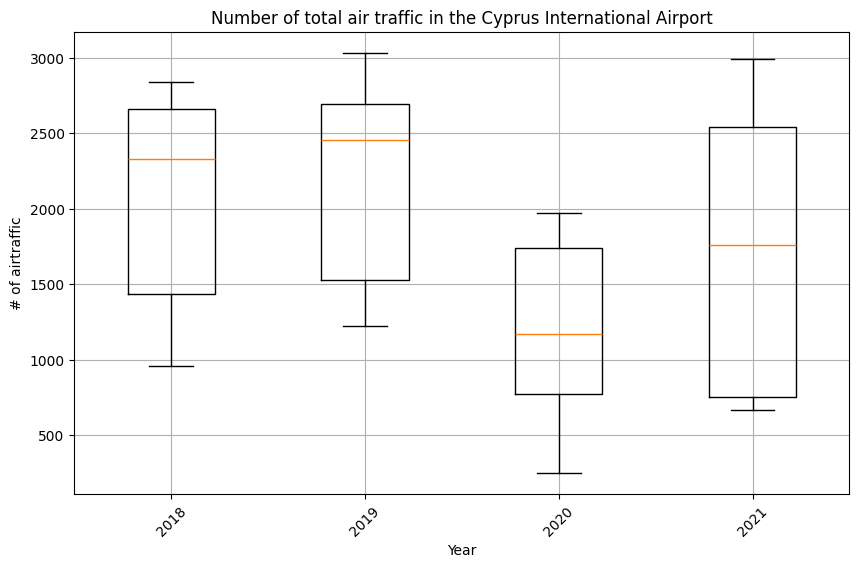

In [163]:
# Extract the year from the date column
merged_airports_TTL_traffic_df['Year'] = merged_airports_TTL_traffic_df['Date'].str.split(' ').str[1]

# Group the data by year
grouped_data = merged_airports_TTL_traffic_df.groupby('Year')['TotalSum(TTL)'].apply(list)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(grouped_data.values)

# Customize the plot
plt.title('Number of total air traffic in the Cyprus International Airport')
plt.xlabel('Year')
plt.ylabel('# of airtraffic')
plt.grid(True)

# Set the x-axis labels to show only the year
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index, rotation=45)

# Show the plot
plt.show()

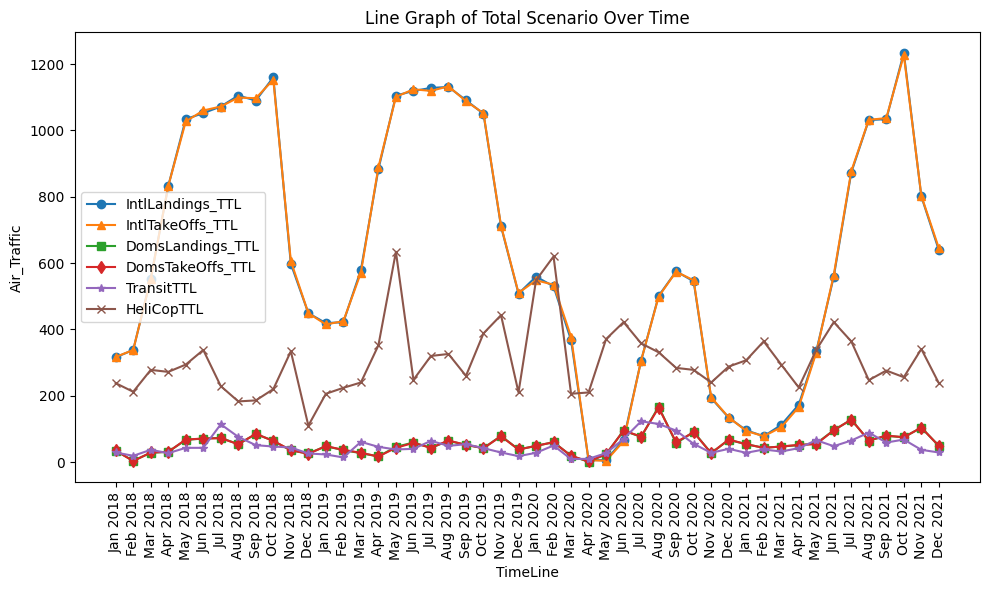

In [164]:
plt.figure(figsize=(10, 6))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_TTL'], label='IntlLandings_TTL', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_TTL'], label='IntlTakeOffs_TTL', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_TTL'], label='DomsLandings_TTL', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsTakeOffs_TTL'], label='DomsTakeOffs_TTL', marker='d')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['TransitTTL'], label='TransitTTL', marker='*')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['HeliCopTTL'], label='HeliCopTTL', marker='x')

plt.title('Line Graph of Total Scenario Over Time')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

##### for International Flights

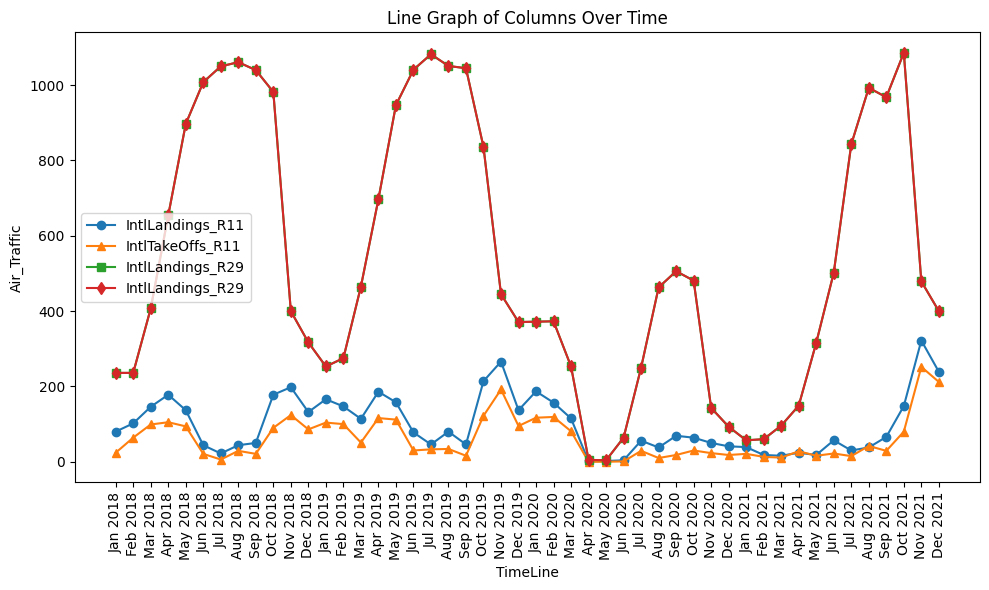

In [165]:
plt.figure(figsize=(10, 6))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_R11'], label='IntlLandings_R11', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlTakeOffs_R11'], label='IntlTakeOffs_R11', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_R29'], label='IntlLandings_R29', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['IntlLandings_R29'], label='IntlLandings_R29', marker='d')

plt.title('Line Graph of Columns Over Time')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

#### for doemstic flights

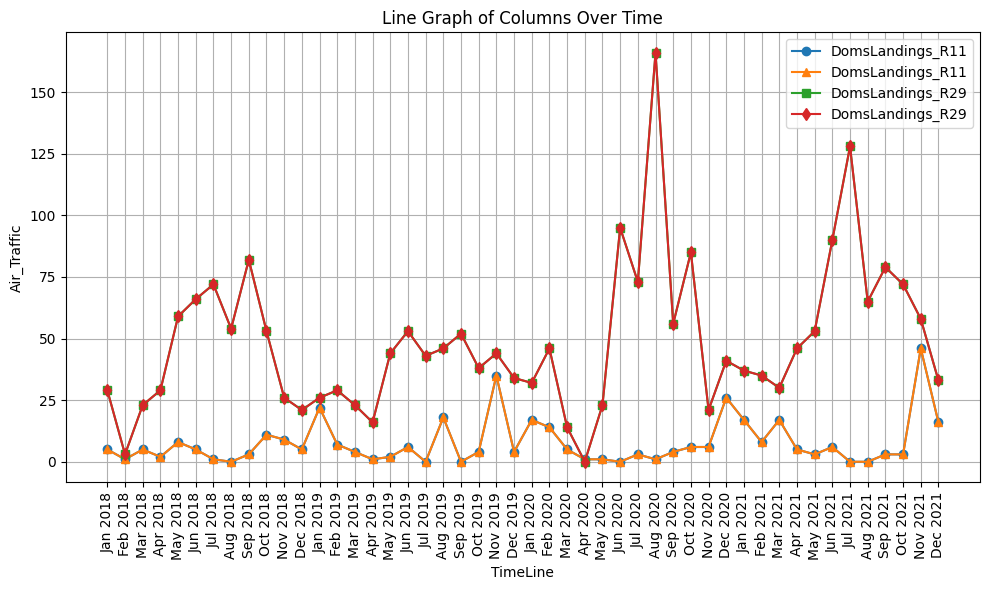

In [166]:
plt.figure(figsize=(10, 6))

plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R11'], label='DomsLandings_R11', marker='o')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R11'], label='DomsLandings_R11', marker='^')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R29'], label='DomsLandings_R29', marker='s')
plt.plot(merged_airports_TTL_traffic_df['Date'], merged_airports_TTL_traffic_df['DomsLandings_R29'], label='DomsLandings_R29', marker='d')

plt.title('Line Graph of Columns Over Time')
plt.xlabel('TimeLine')
plt.ylabel('Air_Traffic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

##### Exploration of Daily Weather Data

In [167]:
weather_data_df.shape

(1444, 11)

In [168]:
weather_data_df.head()

,Date,tavg,tmin,tmax,percp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,14.2,8.8,18.0,None,None,345.0,16.0,NaN,1013.5,None
1,2018-01-02,15.6,11.0,18.3,None,None,NaN,11.3,NaN,1015.7,None
2,2018-01-03,17.5,15.0,19.0,None,None,NaN,11.9,NaN,1013.9,None
3,2018-01-04,14.7,11.0,17.0,None,None,NaN,14.6,NaN,1007.4,None
4,2018-01-05,13.8,10.0,19.0,None,None,10.0,16.2,NaN,1003.7,None


In [169]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1444 non-null   object 
 1   tavg    1444 non-null   float64
 2   tmin    1444 non-null   float64
 3   tmax    1444 non-null   float64
 4   percp   0 non-null      object 
 5   snow    0 non-null      object 
 6   wdir    1355 non-null   float64
 7   wspd    1443 non-null   float64
 8   wpgt    1257 non-null   float64
 9   pres    1424 non-null   float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 124.2+ KB


##### null Value in the dataset

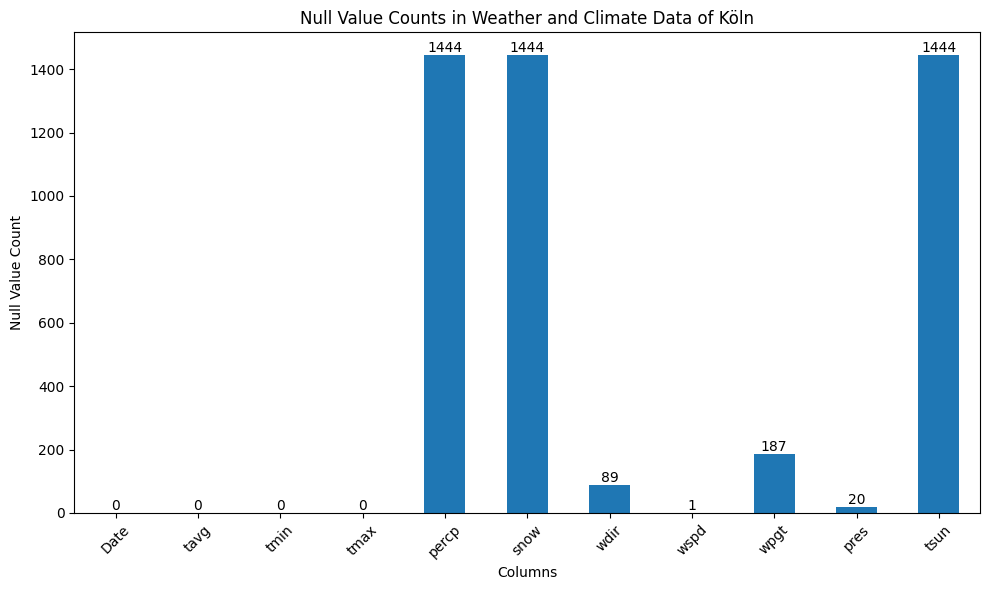

In [170]:
# Count the number of null values in each column
null_counts = weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of Köln')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### As Perception "percp" , "snow" and "tsun" 

In [171]:
weather_data_df = weather_data_df.drop(columns= ["percp" , "snow", "tsun"])
weather_data_df.shape

(1444, 8)

In [172]:
weather_data_df['wdir'].interpolate(method='linear', inplace=True)
weather_data_df['wspd'].interpolate(method='linear', inplace=True)
weather_data_df['pres'].interpolate(method='linear', inplace=True)
null_counts = weather_data_df.isnull().sum()
print(null_counts)

Date      0
tavg      0
tmin      0
tmax      0
wdir      0
wspd      0
wpgt    187
pres      0
dtype: int64


In [177]:
mean_direction = weather_data_df['wpgt'].mean()
weather_data_df['wpgt'].fillna(mean_direction, inplace=True)
null_counts = weather_data_df.isnull().sum()
print(null_counts)

Date    0
tavg    0
tmin    0
tmax    0
wdir    0
wspd    0
wpgt    0
pres    0
dtype: int64
